In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Content of the tables
### Chemicals table - all of the concentration of the specific chemical, code for the sensor, amount of water(all the data is from 2023)
### Merged_oxygen table - the code of the sensor(it is either 01/07, but it is the same), amount of oxygen, start time, end time(data from 2021)


In [52]:
ammonium = pd.read_parquet('data/Chemical measurements influent 2023_2024/ammonium_2024.parquet')
ammonium = ammonium.rename(columns={"hstWaarde": "hstWaarde_ammonium_2023", "historianTagnummer": "historianTagnummer_ammonium", "datumBeginMeting": "datumBeginMeting_ammonium", "datumEindeMeting": "datumEindeMeting_ammonium"}).reset_index(drop=True)
ammonium['hstWaarde_ammonium'] = ammonium['hstWaarde_ammonium'].apply(pd.to_numeric, errors='coerce')

nitrate = pd.read_parquet('data/Chemical measurements influent 2023_2024/nitrate_2024.parquet')
nitrate = nitrate.rename(columns={"hstWaarde": "hstWaarde_nitrate", "historianTagnummer": "historianTagnummer_nitrate"}).reset_index(drop=True)
nitrate['hstWaarde_nitrate'] = nitrate['hstWaarde_nitrate'].apply(pd.to_numeric, errors='coerce')

phosphate = pd.read_parquet('data/Chemical measurements influent 2023_2024/phosphate_2024.parquet')
phosphate = phosphate.rename(columns={"hstWaarde": "hstWaarde_phosphate", "historianTagnummer": "historianTagnummer_phosphate"}).reset_index(drop=True)
phosphate['hstWaarde_phosphate'] = phosphate['hstWaarde_phosphate'].apply(pd.to_numeric, errors='coerce')

water_flow = pd.read_parquet('data/Influent_Flow_2023.parquet')
water_flow = water_flow.rename(columns={"hstWaarde": "hstWaarde_water"}).reset_index(drop=True)
water_flow['hstWaarde_water'] = water_flow['hstWaarde_water'].apply(pd.to_numeric, errors='coerce')

chemicals = pd.concat([ammonium, nitrate, phosphate, water_flow['hstWaarde_water']], axis=1)
chemicals = chemicals.drop(columns=['waardebewerkingsmethodeCode', 'datumBeginMeting', 'datumEindeMeting'])
cols_to_convert = [
    'hstWaarde_ammonium',
    'hstWaarde_nitrate',
    'hstWaarde_phosphate'
]
chemicals[cols_to_convert] = chemicals[cols_to_convert].apply(pd.to_numeric, errors='coerce')

In [3]:
chemicals

,historianTagnummer_ammonium,hstWaarde_ammonium,historianTagnummer_nitrate,hstWaarde_nitrate,historianTagnummer_phosphate,hstWaarde_phosphate,hstWaarde_water
0,EDE_B121069913_K600.MTW,1.310,EDE_B121069914_K600.MTW,4.730,EDE_B121069917_K600.MTW,0.001,3330.199
1,EDE_B121069913_K600.MTW,1.251,EDE_B121069914_K600.MTW,4.730,EDE_B121069917_K600.MTW,0.001,3288.798
2,EDE_B121069913_K600.MTW,1.182,EDE_B121069914_K600.MTW,4.730,EDE_B121069917_K600.MTW,0.000,3260.545
3,EDE_B121069913_K600.MTW,1.181,EDE_B121069914_K600.MTW,4.675,EDE_B121069917_K600.MTW,0.000,3253.279
4,EDE_B121069913_K600.MTW,1.179,EDE_B121069914_K600.MTW,4.605,EDE_B121069917_K600.MTW,0.000,3263.276
...,...,...,...,...,...,...,...
525234,NaN,NaN,NaN,NaN,NaN,NaN,627.162
525235,NaN,NaN,NaN,NaN,NaN,NaN,1433.649
525236,NaN,NaN,NaN,NaN,NaN,NaN,1637.519
525237,NaN,NaN,NaN,NaN,NaN,NaN,1933.898


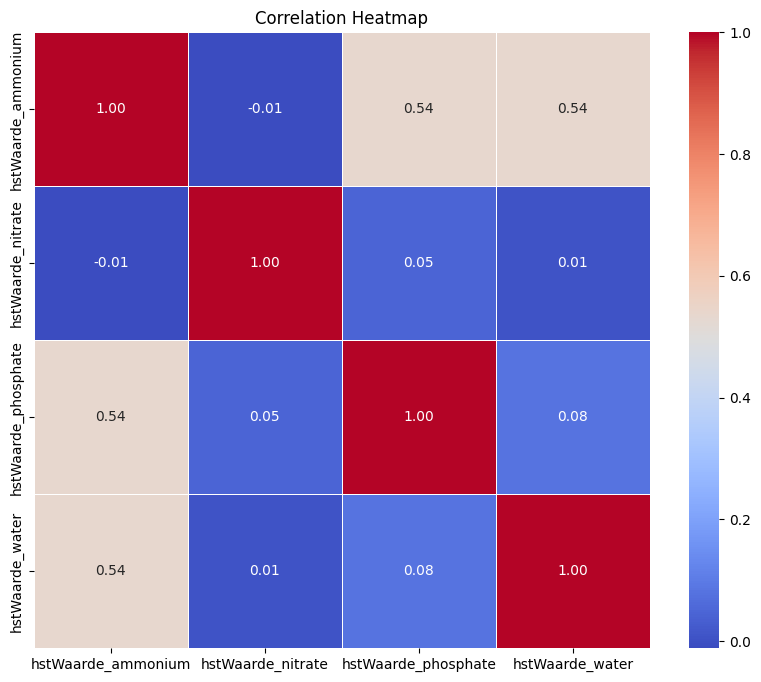

In [4]:
chemicalsForCorr = chemicals.drop(columns=['historianTagnummer_ammonium', 'historianTagnummer_nitrate', 'historianTagnummer_phosphate'])
corr = chemicalsForCorr.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)
plt.title("Correlation Heatmap")
plt.show()

In [5]:
oxygen_a = pd.read_parquet('data/OxygenData2024/oxygen_a_2024.parquet')
legacy_oxygen_a = pd.read_parquet('data/HistoricalWWTPData/DTWINTERNALWWTPDATA/Oxygen Data/zuurstofA_EDE_B121069901_K600.MTW.parquet')
oxygen_b = pd.read_parquet('data/OxygenData2024/oxygen_b_2024.parquet')
legacy_oxygen_b = pd.read_parquet('data/HistoricalWWTPData/DTWINTERNALWWTPDATA/Oxygen Data/zuurstofB_EDE_B121069907_K600.MTW.parquet')
merged_oxygen_a = pd.concat([legacy_oxygen_a, oxygen_a])
merged_oxygen_b = pd.concat([oxygen_b, legacy_oxygen_b])
merged_oxygen = pd.concat([merged_oxygen_a, merged_oxygen_b])
merged_oxygen

,historianTagnummer,hstWaarde,datumBeginMeting,datumEindeMeting,waardebewerkingsmethodeCode
0,EDE_B121069901_K600.MTW,0.003,2021-01-01 00:00:00,2021-01-01 00:01:00,NaN
1,EDE_B121069901_K600.MTW,0.003,2021-01-01 00:01:00,2021-01-01 00:02:00,NaN
2,EDE_B121069901_K600.MTW,0.003,2021-01-01 00:02:00,2021-01-01 00:03:00,NaN
3,EDE_B121069901_K600.MTW,0.003,2021-01-01 00:03:00,2021-01-01 00:04:00,NaN
4,EDE_B121069901_K600.MTW,0.003,2021-01-01 00:04:00,2021-01-01 00:05:00,NaN
...,...,...,...,...,...
44635,EDE_B121069907_K600.MTW,0.549,2021-12-31 23:55:00,2021-12-31 23:56:00,NaN
44636,EDE_B121069907_K600.MTW,0.559,2021-12-31 23:56:00,2021-12-31 23:57:00,NaN
44637,EDE_B121069907_K600.MTW,0.554,2021-12-31 23:57:00,2021-12-31 23:58:00,NaN
44638,EDE_B121069907_K600.MTW,0.568,2021-12-31 23:58:00,2021-12-31 23:59:00,NaN


Text(0.5, 1.0, 'Distribution of ammonium in 2021')

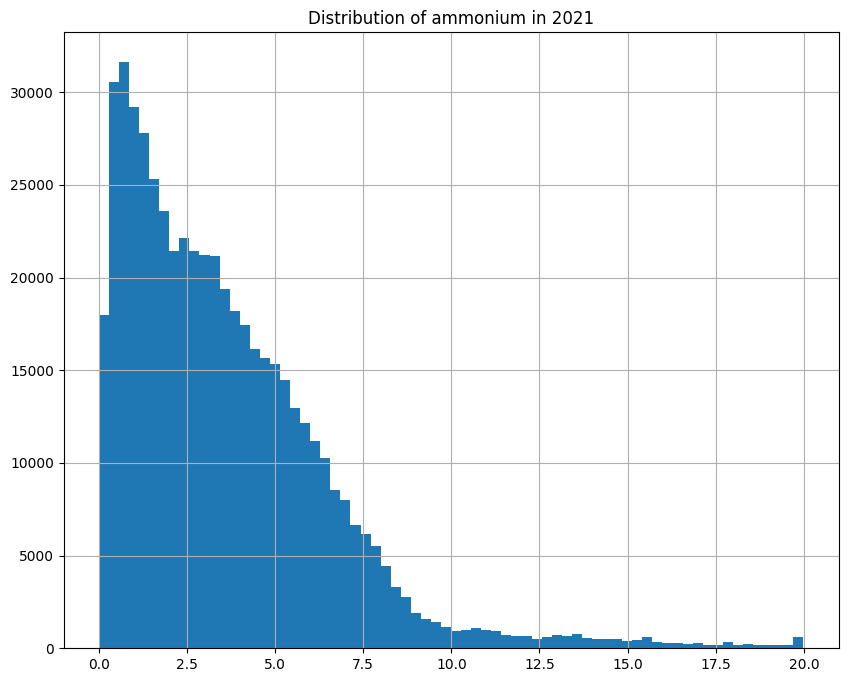

In [80]:
sensor_13 = pd.read_parquet('data/HistoricalWWTPData/DTWINTERNALWWTPDATA/Data/EDE_B121069913_K600.MTW.parquet')
sensor_13['hstWaarde'] = sensor_13['hstWaarde'].apply(pd.to_numeric, errors='coerce')
sensor_13 = sensor_13.rename(columns={"hstWaarde": "hstWaarde_ammonium_2021"}).reset_index(drop=True)
sensor_13.hist(bins=70, figsize=(10, 8))
plt.title(f'Distribution of ammonium in 2021')

array([[<Axes: title={'center': 'hstWaarde_ammonium'}>]], dtype=object)

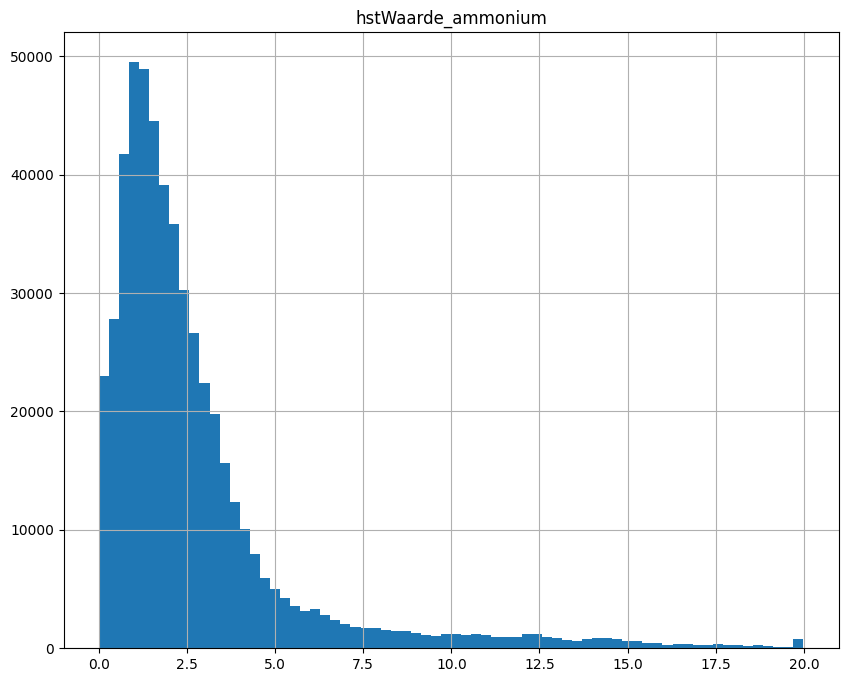

In [79]:
ammonium.hist(bins=70, figsize=(10, 8))
plt.title(f'Distribution of ammonium in 2023')